In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import nltk
import scipy
import seaborn as sns

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,roc_auc_score, roc_curve, precision_score, recall_score


In [2]:
train_file_df = pd.read_csv('Tweets.csv')
train_file_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [26]:
'''takign a sample variable for testing'''

#train_file_df = train_file.iloc[0:50, 0:50]
#train_file_df

In [3]:
'''
Droping the un-necessary columns
'''
'''repalce 'train_file_df' with 'train_file' if not performing testing'''
df = train_file_df.drop(columns = ['textID', 'selected_text'])
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [4]:
'''Data Processing'''
# remove duplicates
df = df.drop_duplicates()
#df

In [6]:
'''
Filtering the text
 - removing punctuation
 - removing stopwords
 - performing stemmings
 - lemmatization
 
'''
import re
import nltk
#nltk.download('wordnet')
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#df.shape[0]

def preprocessor(text):
    text = str(text)
    text = text.lower()
    # text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    
    text = re.sub(r'[^\w\s]', '', text)     #remove punctuation
    text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in text.split()])     #lemmatization
    #text = ' '.join([PorterStemmer().stem(word) for word in text.split()])     #stemming
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])     #remove stopwords
    return text

#tqdm shows progress bar
for i in tqdm(range(df.shape[0])):
    df.loc[i,'text'] = preprocessor(df['text'][i])
    
#df

#The data is now cleaned. We have removed all stopwords, punctuation and performed stemming

100%|██████████| 27481/27481 [01:11<00:00, 386.41it/s]


In [7]:
'''TF-IDF Vectorization'''

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
#y=df['sentiment'].values
tf_idf_X = tfidf.fit_transform(df.text)

#print(y)
#print(tf_idf_X)
#df['text']

In [8]:
'''
Bag of words vectorization using CountVectorizer
'''
from sklearn.feature_extraction.text import CountVectorizer

#X = CountVectorizer.fit(df['text'])
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_X = bow_vectorizer.fit_transform(df['text'])
#print(bow_X)





In [9]:
'''
N-Gram vectorization using CountVectorizer
https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training/n-gram-vectorizing?resume=false&u=42290089
https://towardsdatascience.com/nlp-in-python-vectorizing-a2b4fc1a339e
https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

'''

#ngram_vect = CountVectorizer(ngram_range=(1,2))    # tells to looks for unigram to bigram
ngram_vect = CountVectorizer(ngram_range=(1,3))    # tells to look for unigram to trigram 
#ngram_vect = CountVectorizer(ngram_range=(2,2))    # tells to look for only bigrams

ngram_X = ngram_vect.fit_transform(df['text'])
#print(ngram_X.shape)
#print(ngram_X)
#print(ngram_vect.get_feature_names())




In [10]:
'''
process y variable
'''
y=df['sentiment'].values
MAP={'negative':0, 'neutral':1, 'positive':2}
df.sentiment = df.sentiment.map(MAP)
Y = pd.Series(y).map(MAP)
Y

0        1
1        0
2        0
3        0
4        0
        ..
27476    0
27477    0
27478    2
27479    2
27480    1
Length: 27481, dtype: int64

In [11]:
'''
Splitting the dataset
'''

#X = tf_idf_X
X = ngram_X
#X = bow_X

#Y = pd.Series(y).map(MAP)
#MAP={'negative':0, 'neutral':1, 'positive':2}
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,len(Y),'\nTraining set  ---> ',Train_X.shape,len(Train_Y),'\nTesting set   ---> ', Test_X.shape,'', len(Test_Y))

Original set  --->  (27481, 300511) 27481 
Training set  --->  (21984, 300511) 21984 
Testing set   --->  (5497, 300511)  5497


In [12]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [13]:
#Let us define functions to summarise the Prediction's scores .



#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 69.6%
F1 Score = 69.6%

 Confusiton Matrix:
 [[ 934  537   92]
 [ 285 1648  262]
 [  62  433 1244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66      1563
           1       0.63      0.75      0.68      2195
           2       0.78      0.72      0.75      1739

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.70      0.70      0.70      5497



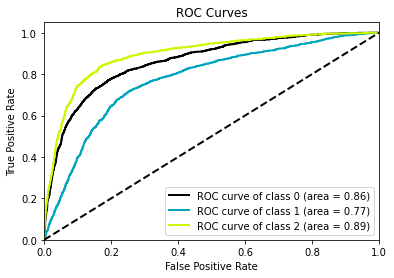

In [14]:
'''
Logistic Regression
'''



LR_model = LogisticRegression()
LR = LR_model.fit(Train_X, Train_Y)
pred = LR.predict(Test_X)
pred_prob = LR.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,0)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 67.4%
F1 Score = 67.30000000000001%

 Confusiton Matrix:
 [[ 883  587   93]
 [ 256 1638  301]
 [  80  476 1183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.56      0.63      1563
           1       0.61      0.75      0.67      2195
           2       0.75      0.68      0.71      1739

    accuracy                           0.67      5497
   macro avg       0.69      0.66      0.67      5497
weighted avg       0.69      0.67      0.67      5497



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


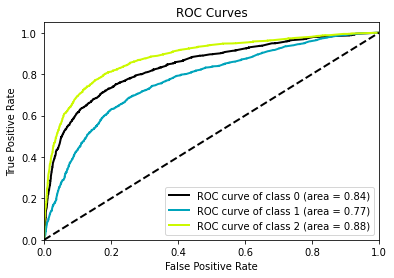

In [15]:
# Building Random Forest Classifier

RF_model = RandomForestClassifier()
RF = RF_model.fit(Train_X, Train_Y)
pred = RF.predict(Test_X)
pred_prob = RF.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,2)

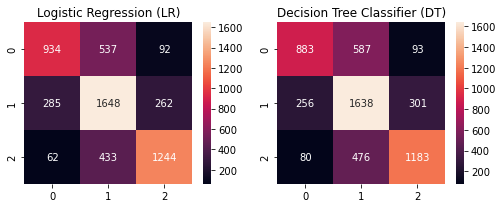

In [16]:
#Plotting Confusion-Matrix of all the predictive Models


labels=['Positive','Negative']
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[14,3*math.ceil(len([all_models])/4)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(1,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/2),2,i+1)
        pred = all_models[i].predict(Test_X)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, fmt='.0f') #vmin=0,vmax=5,cmap='BuGn'
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,RF])

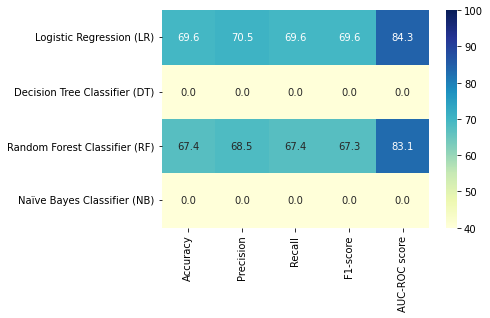

In [17]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=40, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

In [ ]:
'''
neutraldata = df[df['sentiment']=='neutral']
neutraldata= neutraldata['text']
neutraldata


'''Assigning prediction labels to target variables'''

MAP={'negative':0, 'neutral':1, 'positive':2}
df.sentiment = df.sentiment.map(MAP)
df
'''